# Image quality

- ArcFace
- SER-FIQ quality assessment

In [1]:
# System
import os

# Data preparation
import pandas as pd
import numpy as np

# Plotting
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pysankey import sankey

# Normalization and cosine distance
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance

# Pyeer
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import plot_eer_stats

# Settings
%matplotlib inline
# figure size in inches optional
rcParams['figure.figsize'] = 8, 8
# sns.set_style('whitegrid')

In [2]:
df_image_quality_arcface = pd.read_csv("../evaluation/image_quality/image_quality_reconstructed_pemiu.csv")
df_image_quality_arcface

,Unnamed: 0,filename,img_original,img_reconstructed,img_pemiu_16,img_pemiu_32,img_pemiu_64,img_pemiu_128,cos_sim_bonafide_synthesized_pemiu16_normalized,cos_sim_bonafide_synthesized_pemiu32_normalized,cos_sim_bonafide_synthesized_pemiu64_normalized,cos_sim_bonafide_synthesized_pemiu128_normalized,cos_sim_bonafide_synthesized_unprotected_normalized,quality_img_original,quality_img_reconstructed,quality_img_pemiu_16,quality_img_pemiu_32,quality_img_pemiu_64,quality_img_pemiu_128
0,0,Aaron_Eckhart_0001,../data/lfw_align/Aaron_Eckhart/Aaron_Eckhart_...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.200561,0.245139,0.347631,0.506194,0.568656,0.785188,0.609483,0.530018,0.689140,0.549540,0.539768
1,1,Aaron_Guiel_0001,../data/lfw_align/Aaron_Guiel/Aaron_Guiel_0001...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.202998,0.295640,0.276507,0.383687,0.452854,0.764814,0.720664,0.780743,0.737690,0.786692,0.550054
2,2,Aaron_Patterson_0001,../data/lfw_align/Aaron_Patterson/Aaron_Patter...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.349227,0.224479,0.204209,0.345078,0.505803,0.737193,0.629274,0.594657,0.588965,0.736233,0.821796
3,3,Aaron_Peirsol_0001,../data/lfw_align/Aaron_Peirsol/Aaron_Peirsol_...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.211793,0.261339,0.221673,0.287739,0.505694,0.788944,0.805024,0.807184,0.526611,0.726330,0.756035
4,4,Aaron_Peirsol_0002,../data/lfw_align/Aaron_Peirsol/Aaron_Peirsol_...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.223740,0.173296,0.203490,0.331966,0.590697,0.782536,0.827378,0.805476,0.469740,0.809216,0.618881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,13228,Zorica_Radovic_0001,../data/lfw_align/Zorica_Radovic/Zorica_Radovi...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.262668,0.348710,0.371027,0.241530,0.727079,0.741519,0.805177,0.729657,0.718246,0.618745,0.638952
13229,13229,Zulfiqar_Ahmed_0001,../data/lfw_align/Zulfiqar_Ahmed/Zulfiqar_Ahme...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.282053,0.385010,0.327613,0.275810,0.629604,0.660749,0.702786,0.679262,0.541178,0.729201,0.514417
13230,13230,Zumrati_Juma_0001,../data/lfw_align/Zumrati_Juma/Zumrati_Juma_00...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,../recreate_icip2022_face_reconstruction/exper...,0.305765,0.334173,0.389070,0.290579,0.539931,0.470757,0.628143,0.655461,0.644609,0.678837,0.692493
13231,13231,Zurab_Tsereteli_0001,../d

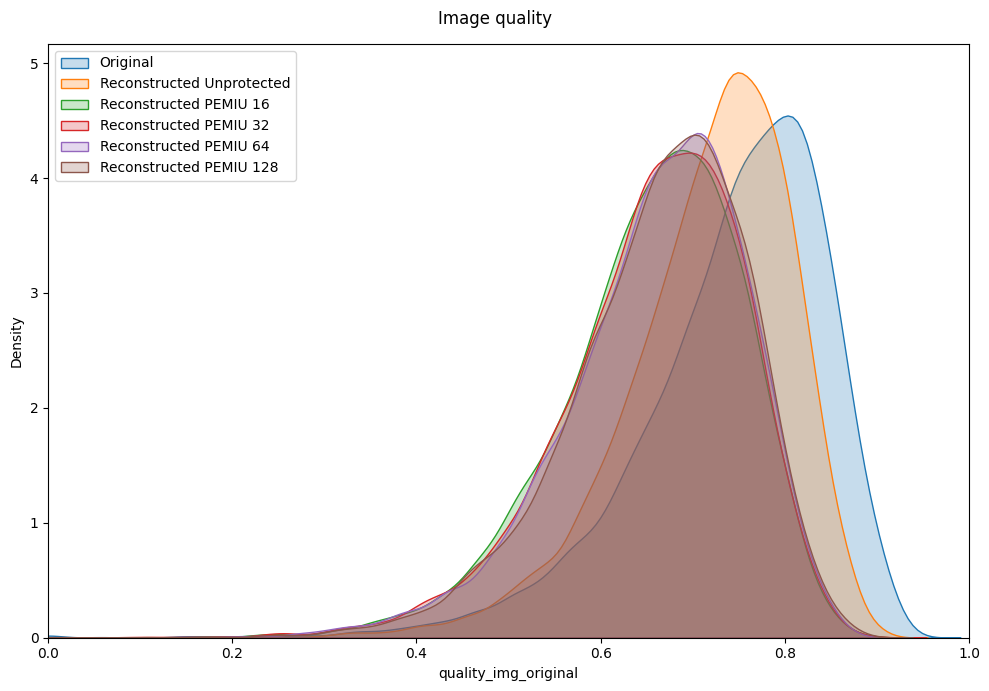

In [3]:
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)

# Title
fig.suptitle("Image quality")

# Settings
labels_th = ['ZeroFMR_TH', 'FMR1000_TH', 'FMR100_TH', 'FMR10_TH']
block_sizes = ['16', '32', '64', '128']
colors = ["b", "r", "g", "c"]
labels = ["Original", "Reconstructed Unprotected"]

sns.kdeplot(df_image_quality_arcface[f'quality_img_original'], ax=ax, label=f"Original", fill=True)
sns.kdeplot(df_image_quality_arcface[f'quality_img_reconstructed'], ax=ax, label=f"Reconstructed Unprotected", fill=True)
for blocksize in block_sizes:
    sns.kdeplot(df_image_quality_arcface[f'quality_img_pemiu_{blocksize}'], ax=ax, label=f"Reconstructed PEMIU {blocksize}", fill=True)
# ax.set_title(f"Reconstructed")


for i, (ax) in enumerate( fig.get_axes() ):
    # sns.kdeplot(df[f'cos_sim_bonafide_synthesized_pemiu{blocksize}_normalized'], ax=ax, label=f"PEMIU protected", fill=True)
    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 7.5)
    ax.label_outer()
    ax.legend(loc=2)

    
# Render plot
plt.xlim([0, 1])

plt.show()

## Mean image quality

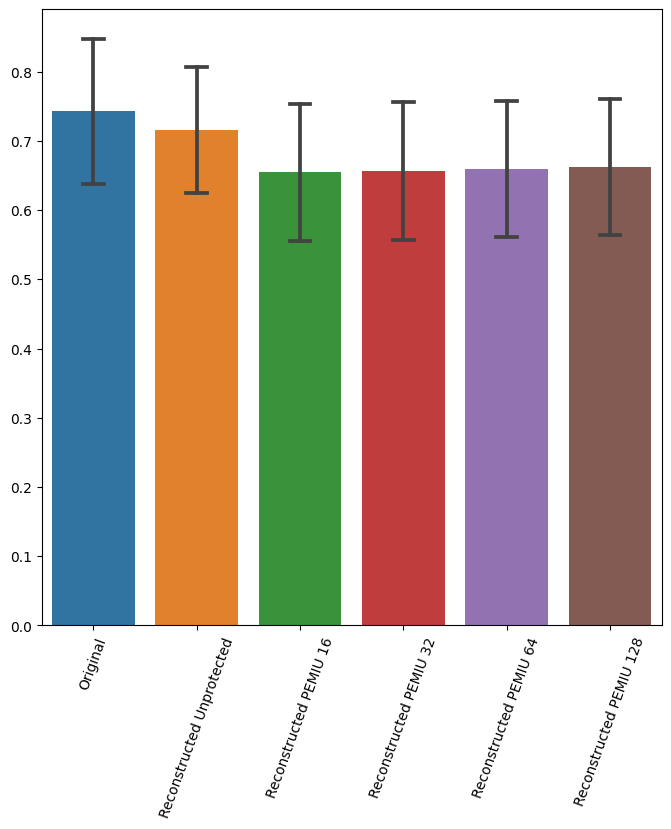

In [4]:
# set seaborn plotting aesthetics
# sns.set(style='white')

labels = ["Original", "Reconstructed Unprotected", "Reconstructed PEMIU 16",
          "Reconstructed PEMIU 32", "Reconstructed PEMIU 64", "Reconstructed PEMIU 128"]

fig, ax = plt.subplots()
sns.barplot(data=df_image_quality_arcface[df_image_quality_arcface.columns[pd.Series(df_image_quality_arcface.columns).str.startswith('quality')]], 
            ax=ax, 
            estimator=np.mean, errorbar=('sd'), capsize=.2)
ax.set_xticklabels(labels, rotation=70)

plt.show()

In [5]:
df_image_quality_arcface[f'quality_img_original'].std()

0.10513393529363312